## NoSQL (MongoDB) (sesión 2)


## Introducción

![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en el contenedor usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [3]:
RunningInCOLAB: bool = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [4]:
if not RunningInCOLAB:
    !sudo apt-get update -qq
    !sudo apt-get install -y -qq gpg p7zip

## Instalación inicial de MongoDB (sólo necesaria en Google Colab)

In [5]:
if RunningInCOLAB:
  !wget -q https://raw.githubusercontent.com/dsevilla/bdge/refs/heads/24-25/addendum/mongo-utils/run-mongo-local.sh
  !bash run-mongo-local.sh

Adding system user `mongodb' (UID 104) ...
Adding new user `mongodb' (UID 104) with group `nogroup' ...
Not creating home directory `/home/mongodb'.
Adding group `mongodb' (GID 107) ...
Done.
Adding user `mongodb' to group `mongodb' ...
Adding user mongodb to group mongodb
Done.
deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-

## Descarga de los datos en formato CSV

 - Formato: 7zipped
 - Ficheros:
   - **Comments**.csv
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **Posts**.csv
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **Tags**.csv
    - Id
    - Count
    - ExcerptPostId
    - TagName
    - WikiPostId
   - **Users**.csv
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **Votes**.csv
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

In [6]:
!wget https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.001 -O - > es.stackoverflow.csv.7z
!wget https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.002 -O - >> es.stackoverflow.csv.7z

--2025-02-27 11:39:37--  https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.001
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dsevilla/bd2-data/main/es.stackoverflow/es.stackoverflow.csv.7z.001 [following]
--2025-02-27 11:39:37--  https://raw.githubusercontent.com/dsevilla/bd2-data/main/es.stackoverflow/es.stackoverflow.csv.7z.001
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104857600 (100M) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>] 100.00M   279MB/s    in 0.4s    

2025-02-27 11:39:38 (279 MB/s) - writ

In [7]:
!7zr x -aoa es.stackoverflow.csv.7z
!rm es.stackoverflow.csv.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 200457538 bytes (192 MiB)

Extracting archive: es.stackoverflow.csv.7z
--
Path = es.stackoverflow.csv.7z
Type = 7z
Physical Size = 200457538
Headers Size = 248
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      1% - Comments.csv                     2% - Comments.csv                     3% - Comments.csv                     4% - Comments.csv                     5% - Comments.csv                     6% - Comments.csv                     7% - Comments.csv                   

In [8]:
!head Users.csv

Id,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,LastAccessDate,Location,Reputation,UpVotes,Views,WebsiteUrl
-1,"<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas antiguas sin respuesta aproximadamente cada hora, para que atraigan algo de atención.</li><br/><li>Tener la propiedad de las preguntas y respuestas wiki para que nadie se lleve reputación por ellas</li><br/><li>Recibir la propiedad de los votos negativos en las publicaciones de spam o dañinas que son borradas permanentemente</li><br/><li>Tener la propiedad de las ediciones sugeridas por usuarios anónimos</li><br/><li><a href=""http://meta.stackoverflow.com/a/92006"">Quitar preguntas abandonadas</a></li><br/></ul><br/>",-1,2015-10-26T21:36:24.767,Comunidad,22504,2015-10-26T21:36:24.767,en la granja de servidores,1,10211,2516,
1,"<p>Dev #2 who helped create Stack Overflow currently

## Instalación de la librería `pymongo`

In [9]:
%pip install pymongo tqdm[notebook] pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00


In [10]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [11]:
from pymongo import MongoClient

## Conexión a la base de datos

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [12]:
import os
db_hostname: str = "localhost" if RunningInCOLAB else os.getenv('DB_HOSTNAME', "mongo")

In [13]:
from typing import Any

client: MongoClient[dict[str, Any]] = MongoClient(db_hostname,27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [14]:
client.list_database_names()

['admin', 'config', 'local']

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [15]:
from pymongo.database import Database

db: Database = client.stackoverflow
# db: Database = client['stackoverflow'] # (equivalente)
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

## Importación de los ficheros CSV

Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [16]:
import csv
import sys
from datetime import datetime
from pymongo.collection import Collection
from typing import Any
from collections.abc import Callable, Iterable, Iterator
from tqdm.notebook import tqdm

def batched(iterable: Iterable, n) -> Iterable:
    from itertools import islice
    if n < 1:
        raise ValueError('n must be at least one')
    it: Iterator = iter(iterable)
    while batch := tuple(islice(it, n)):
        yield batch

def csv_to_mongo(file: str, coll: Collection):
    """
    Carga un fichero CSV en Mongo. file especifica el fichero, coll la colección
    dentro de la base de datos, y date_cols las columnas que serán interpretadas
    como fechas.
    """
    # Convertir todos los elementos que se puedan a números
    def to_numeric(d: str) -> str| int | float:
        if len(d) == 0:
            return ''
        if not ((d[0] >= '0' and d[0] <= '9') or d[0] == '-' or d[0] == '+' or d[0]=='.'):
            return d
        try:
            return int(d) if abs(int(d)) <= sys.maxsize else d # Ensure number is inside MongoDB max number range
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d

    def to_date(d: str) -> datetime | None:
        """To ISO Date. If this cannot be converted, return NULL (None)"""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None

    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')

        # Se leen las columnas. Sus nombres se usarán para crear las diferentes columnas en la familia
        columns: list[str] = next(reader)

        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols: list[Callable[[str], Any]] = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))

        for batch in batched(tqdm(reader, desc='Leyendo e insertando filas...'), 10000):
            docs: list[dict[str, str | datetime | float | int | None]] = []
            for row in batch:
                built_row: list[str | datetime | float | int | None] = [func(e) for (func,e) in zip(func_to_cols, row)]
                docs.append(dict(zip(columns, built_row)))
            coll.insert_many(docs)

        print("¡Hecho!")

In [17]:
csv_to_mongo('Posts.csv',db.posts)

Leyendo e insertando filas...: 0it [00:00, ?it/s]

¡Hecho!


In [18]:
csv_to_mongo('Users.csv',db.users)

Leyendo e insertando filas...: 0it [00:00, ?it/s]

¡Hecho!


In [19]:
csv_to_mongo('Votes.csv',db.votes)

Leyendo e insertando filas...: 0it [00:00, ?it/s]

¡Hecho!


In [20]:
csv_to_mongo('Comments.csv',db.comments)

Leyendo e insertando filas...: 0it [00:00, ?it/s]

¡Hecho!


In [21]:
csv_to_mongo('Tags.csv',db.tags)

Leyendo e insertando filas...: 0it [00:00, ?it/s]

¡Hecho!


In [22]:
posts: Collection[dict[str, Any]] = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

In [23]:
posts.count_documents({})

410346

## Framework de Agregación

Framework de agregación:
- Aquí está la referencia de las diferentes etapas por las que puede pasar un pipeline: https://www.mongodb.com/docs/manual/reference/operator/aggregation-pipeline/.
- Y aquí los distintos operadores que se permiten dentro de las etapas: https://docs.mongodb.com/manual/reference/operator/aggregation/.
- Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/.

A continuación un vídeo interesante:

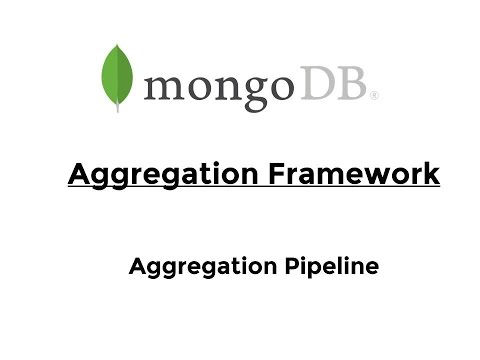

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

Aqui tenemos un esquema con un ejemplo básico de agregación.

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

## Algunos operadores de agregación



### `$match`

Este operador permite filtrar los documentos que queremos que pasen a la siguiente fase del pipeline definiendo una serie de condiciones sobre los campos de los mismos.

Vamos a filtrar aquellos documentos que tengan un `Score` igual o superior (`$gte`) a 150.

In [25]:
from pymongo.command_cursor import CommandCursor

respuestas: CommandCursor[dict[str, Any]] = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 150}}}
])
list(respuestas)

[{'_id': ObjectId('67c04f13bbac7434d961f360'),
  'Id': 40,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<p>Asumiendo que se está haciendo un <code>join</code> de columnas sin duplicados, lo cuál es un caso común:</p><br/><ul><br/><li><p>Un <strong>inner join</strong> de A y B entregará el resultado de la intersección de los conjuntos A y B. En otras palabras, la parte <em>interna</em> –intersección– en un diagrama de Venn.</p><br/></li><br/><li><p>Un <strong>full outer join</strong> entre A y B entregará el resultado de la unión de A y B. En otras palabras, la parte <em>externa</em> –unión– en un diagrama de Venn .</p><br/></li><br/></ul><br/><h1>Ejemplos:</h1><br/><p>Supongamos que tenemos dos tablas, con una sola columna cada una y los siguientes datos:</p><br/><pre><code>A    B<br/>-    -<br/>1    3<br/>2    4<br/>3    5<br/>4    6<br/></code></pre><br/><p>Nota que (1,2) solo se encuentran en A, (3,4) son comunes y (5,6) solamente se encuentran en B.</p><br/><h1>Inner J

### `$project`

El operador `$project`permite filtar qué campos de los documentos queremos usar en la siguientes fases de agregación.

Generalmente este operador suele combinarse con otros como `$find`, `$match` o `$lookup` en fases más avanzadas de la agregación.

En el siguiente ejemplo, realizamos un filtrado en donde solo nos quedamos con el campo `Id` de los posts.

In [26]:
respuestas: CommandCursor[dict[str, Any]] = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

[{'_id': ObjectId('67c04f13bbac7434d961f33c'), 'Id': 1},
 {'_id': ObjectId('67c04f13bbac7434d961f33d'), 'Id': 2},
 {'_id': ObjectId('67c04f13bbac7434d961f33e'), 'Id': 3},
 {'_id': ObjectId('67c04f13bbac7434d961f33f'), 'Id': 4},
 {'_id': ObjectId('67c04f13bbac7434d961f340'), 'Id': 5},
 {'_id': ObjectId('67c04f13bbac7434d961f341'), 'Id': 6},
 {'_id': ObjectId('67c04f13bbac7434d961f342'), 'Id': 7},
 {'_id': ObjectId('67c04f13bbac7434d961f343'), 'Id': 8},
 {'_id': ObjectId('67c04f13bbac7434d961f344'), 'Id': 9},
 {'_id': ObjectId('67c04f13bbac7434d961f345'), 'Id': 10},
 {'_id': ObjectId('67c04f13bbac7434d961f346'), 'Id': 11},
 {'_id': ObjectId('67c04f13bbac7434d961f347'), 'Id': 12},
 {'_id': ObjectId('67c04f13bbac7434d961f348'), 'Id': 14},
 {'_id': ObjectId('67c04f13bbac7434d961f349'), 'Id': 15},
 {'_id': ObjectId('67c04f13bbac7434d961f34a'), 'Id': 16},
 {'_id': ObjectId('67c04f13bbac7434d961f34b'), 'Id': 17},
 {'_id': ObjectId('67c04f13bbac7434d961f34c'), 'Id': 18},
 {'_id': ObjectId('67c0

### `$group`

La función `$group` se usa dentro del *pipeline* de agregación de documentos seguido por Mongo (`.aggregate`). Esta función admite dos parámetros diferentes:
* `_id`: El identificador por el que queremos agrupar los documentos.
* `campo`: Expresión mediante la cual queremos aggregar los documentos (*opcional*).

Vamos a contar el número de posts por `OwnerUserId` en la colección `posts`.

In [27]:
from pymongo.command_cursor import CommandCursor

users_count_scores: CommandCursor[dict[str, Any]] = db.posts.aggregate(
    [
        {
            "$group":{
                "_id": "$OwnerUserId",
                "count": {"$sum": 1}
            }
        },
        {
            "$limit": 10
        }
    ]
)
list(users_count_scores)

[{'_id': 26316, 'count': 4},
 {'_id': 69495, 'count': 2},
 {'_id': 31745, 'count': 2},
 {'_id': 84714, 'count': 3},
 {'_id': 51368, 'count': 1},
 {'_id': 317333, 'count': 5},
 {'_id': 155591, 'count': 1},
 {'_id': 142822, 'count': 2},
 {'_id': 208690, 'count': 1},
 {'_id': 226064, 'count': 4}]

Ahora vamos computar el `score` medio por usuario en base a todos sus posts.

In [28]:
users_avg_scores: CommandCursor[dict[str, Any]] = db.posts.aggregate(
    [{
        "$group":{
            "_id": "$OwnerUserId",
            "avg_score": {"$avg":'$Score'}
        }
        },
        { "$limit": 10 }
    ]
)
list (users_avg_scores)

[{'_id': 2312, 'avg_score': 1.5},
 {'_id': 214769, 'avg_score': 2.0},
 {'_id': 311165, 'avg_score': 0.0},
 {'_id': 184321, 'avg_score': 0.08333333333333333},
 {'_id': 62775, 'avg_score': 2.0},
 {'_id': 200912, 'avg_score': 0.0},
 {'_id': 233022, 'avg_score': 1.0},
 {'_id': 55887, 'avg_score': 0.4166666666666667},
 {'_id': 229803, 'avg_score': 1.0},
 {'_id': 98647, 'avg_score': 0.0}]

### `$lookup`

El operador `$lookup` permite realizar búsquedas en otras colecciones. Podrían interpretarse como un *join* en el modelo relacional. Esta función admite cuatro parámetros diferentes:

*   `from`: especifica la colección en la misma base de datos con la que hacer la búsqueda (o el *join*).
*   `localField`: Especifica el campo de los documentos de entrada a usar para realizar una comparación de igualdad con el campo `foreignField` de los documentos de la colección `from`.  
*   `foreignField`: Especifica el campo de los documentos de la colección `from` a usar en la comparación de igualdad con el `localField`.
*   `as`: Especifica el nombre del nuevo campo array que se añadirá a los documentos de entrada. Este nuevo campo contiene los documentos coincidentes de la colección `from`.

En el ejemplo siguiente, en primer lugar seleccionamos los posts con un `Score` igual o mayor a 150 con `$match` para a continuación seleccionar los usuarios que han publicado dichos posts incluyéndolo en un nuevo campo llamado `owner`.

In [29]:
respuestas: CommandCursor[dict[str, Any]] = posts.aggregate( [
    {'$match': { 'Score' : {'$gte': 150}}},
    {'$lookup': {
        'from': "users",
        'localField': "OwnerUserId",
        'foreignField': "Id",
        'as': "owner"}
    }
])
list(respuestas)

[{'_id': ObjectId('67c04f13bbac7434d961f360'),
  'Id': 40,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<p>Asumiendo que se está haciendo un <code>join</code> de columnas sin duplicados, lo cuál es un caso común:</p><br/><ul><br/><li><p>Un <strong>inner join</strong> de A y B entregará el resultado de la intersección de los conjuntos A y B. En otras palabras, la parte <em>interna</em> –intersección– en un diagrama de Venn.</p><br/></li><br/><li><p>Un <strong>full outer join</strong> entre A y B entregará el resultado de la unión de A y B. En otras palabras, la parte <em>externa</em> –unión– en un diagrama de Venn .</p><br/></li><br/></ul><br/><h1>Ejemplos:</h1><br/><p>Supongamos que tenemos dos tablas, con una sola columna cada una y los siguientes datos:</p><br/><pre><code>A    B<br/>-    -<br/>1    3<br/>2    4<br/>3    5<br/>4    6<br/></code></pre><br/><p>Nota que (1,2) solo se encuentran en A, (3,4) son comunes y (5,6) solamente se encuentran en B.</p><br/><h1>Inner J

### `$arrayElemAt`

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [30]:
respuestas: CommandCursor[dict[str, Any]] = db.posts.aggregate( [
    {'$match': { 'Score' : {'$gte': 150}}},
    {'$lookup': {
        'from': "users",
        'localField': "OwnerUserId",
        'foreignField': "Id",
        'as': "owner"}
    },
    { '$project' : {
        'Id' : True,
        'Score' : True,
        'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
        'owner.DisplayName' : True
      }}
    ])
list(respuestas)

[{'_id': ObjectId('67c04f13bbac7434d961f360'),
  'Id': 40,
  'Score': 206,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('67c04f13bbac7434d961f3e0'),
  'Id': 197,
  'Score': 176,
  'owner': [{'DisplayName': 'Peter Olson'}],
  'username': 'Peter Olson'},
 {'_id': ObjectId('67c04f13bbac7434d961f3e4'),
  'Id': 204,
  'Score': 195,
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'_id': ObjectId('67c04f15bbac7434d9622bae'),
  'Id': 18232,
  'Score': 232,
  'owner': [{'DisplayName': 'Alvaro Montoro'}],
  'username': 'Alvaro Montoro'},
 {'_id': ObjectId('67c04f15bbac7434d9622baf'),
  'Id': 18233,
  'Score': 219,
  'owner': [{'DisplayName': 'Alvaro Montoro'}],
  'username': 'Alvaro Montoro'},
 {'_id': ObjectId('67c04f1dbbac7434d962f465'),
  'Id': 87842,
  'Score': 173,
  'owner': [{'DisplayName': 'Alvaro Montoro'}],
  'username': 'Alvaro Montoro'}]

### `$unwind`

Este operador *desdobla* cada fila por cada elemento del array.

Ej: El siguiente código:

```python
db.inventario.insert_one({ "_id" : 1, "item" : "ABC1", "tallas": [ "S", "M", "L"] })
db.inventario.aggregate( [ { "$unwind" : "$tallas" } ] )
```

Devolverá:

```json
{ "_id" : 1, "item" : "ABC1", "tallas" : "S" }
{ "_id" : 1, "item" : "ABC1", "tallas" : "M" }
{ "_id" : 1, "item" : "ABC1", "tallas" : "L" }
```

En el ejemplo de procesamiento de posts que estamos llevando a cabo, como sabemos que el array `$owner` sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera. En este caso el `ownerDisplayName` que es proyectado (renombrado) como `username`.

In [31]:
respuestas: CommandCursor[dict[str, Any]] = db.posts.aggregate( [
    { '$match': { 'Score' : {'$gte': 150}}},
    { '$lookup': {
        'from': "users",
        'localField': "OwnerUserId",
        'foreignField': "Id",
        'as': "owner"
      }
    },
    { '$unwind': '$owner'},
    { '$project' : {
          'username': '$owner.DisplayName'
      }
    }
    ])
list(respuestas)

[{'_id': ObjectId('67c04f13bbac7434d961f360'), 'username': 'jachguate'},
 {'_id': ObjectId('67c04f13bbac7434d961f3e0'), 'username': 'Peter Olson'},
 {'_id': ObjectId('67c04f13bbac7434d961f3e4'), 'username': 'Konamiman'},
 {'_id': ObjectId('67c04f15bbac7434d9622bae'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('67c04f15bbac7434d9622baf'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('67c04f1dbbac7434d962f465'), 'username': 'Alvaro Montoro'}]

### `$push`

Devuelve un array con *todos* los valores que resultan de aplicar una determinada expresión a los documentos que forman parte del pipeline.

Obtener el listado con el identificador de `Posts` (`Id`) asociados a cada valor de `Score`.

In [32]:
posts_by_score: CommandCursor[dict[str, Any]] = db.posts.aggregate([
    { '$limit': 2000 },
    {
        '$group':{
            '_id': '$Score',
            'posts':{
                '$push': {
                    'post': '$Id'
                }
            }
        }
    }

])
list(posts_by_score)

[{'_id': 24,
  'posts': [{'post': 205},
   {'post': 208},
   {'post': 268},
   {'post': 562},
   {'post': 804},
   {'post': 1435}]},
 {'_id': 47, 'posts': [{'post': 352}, {'post': 2130}]},
 {'_id': 7,
  'posts': [{'post': 32},
   {'post': 42},
   {'post': 91},
   {'post': 108},
   {'post': 141},
   {'post': 155},
   {'post': 224},
   {'post': 238},
   {'post': 277},
   {'post': 286},
   {'post': 292},
   {'post': 317},
   {'post': 328},
   {'post': 366},
   {'post': 373},
   {'post': 399},
   {'post': 401},
   {'post': 418},
   {'post': 434},
   {'post': 452},
   {'post': 468},
   {'post': 547},
   {'post': 550},
   {'post': 565},
   {'post': 602},
   {'post': 604},
   {'post': 735},
   {'post': 746},
   {'post': 762},
   {'post': 784},
   {'post': 795},
   {'post': 851},
   {'post': 916},
   {'post': 940},
   {'post': 942},
   {'post': 950},
   {'post': 954},
   {'post': 968},
   {'post': 970},
   {'post': 1000},
   {'post': 1012},
   {'post': 1016},
   {'post': 1069},
   {'post': 116

### `$addToSet`

 Devuelve un array de todos los valores únicos que resultan de aplicar una expresión a cada documento de un grupo.


Vamos a obtener el listado de `Tags` asociadas a cada tipo de licencia  `ContentLicense`.

In [33]:
license_and_tags: CommandCursor[dict[str, Any]] = db.posts.aggregate([
    { "$match" : {"PostTypeId": 1}},
    {"$limit": 1000},

    {'$group':{
            '_id':'$ContentLicense',
            'AllTags': { '$addToSet': "$Tags" }
        }
    }
])
list(license_and_tags)

[{'_id': 'CC BY-SA 4.0',
  'AllTags': ['<python><python-3.x>',
   '<java><android>',
   '<android><android-studio>',
   '<java><seguridad><ingeniería-inversa>',
   '<java>',
   '<java><android><navigationview>',
   '<c++><c++11>',
   '<sql-server><asp.net-mvc-5>',
   '<python><django><python-3.x>',
   '<python><djangorestframework><django-models>',
   '<php><html><api>',
   '<javascript><validación><email><regex>',
   '<archivo><fish><exists>',
   '<c#>',
   '<python><bootstrap><django><python-3.x><select2>',
   '<javascript><jquery><asincronismo>',
   '<git><git-merge>',
   '<javascript><hapijs>',
   '<git><git-push>',
   '<java><android><android-intent><android-asynctask>',
   '<c#><reflexión>',
   '<python><pip><pillow>',
   '<javascript><jquery><asp.net-mvc>',
   '<.net><asp.net-web-api><asp.net>',
   '<python><django>',
   '<javascript>',
   '<python><django><python-2.7><utf-8><codificación>',
   '<nodejs><loopback>',
   '<mysql><sql><join>',
   '<javascript><clausuras>',
   '<jav

### `$out`

Este comando permite volcar el resultado de un pipeline de agregación en una nueva colección en la base de datos.

In [34]:
respuestas: CommandCursor[dict[str, Any]] = db.posts.aggregate( [
        { '$match': { 'Score' : {'$gte': 40}}},
        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },
        { '$unwind': '$owner'},
        { '$project' : {
             'username': '$owner.DisplayName'
          }
        },
        {'$out': "stackoverflow_users"}
      ])

Un documento de ejemplo de la colección generada `stackoverflow_users`:

In [35]:
pp(db.stackoverflow_users.find_one())

{'_id': ObjectId('67c04f13bbac7434d961f33c'), 'username': 'Konamiman'}


In [36]:
db.stackoverflow_users.count_documents({})

122

## Ejemplos básicos de agregación

### Ejemplo 1: Asociación usuarios con Tags

Con Agregación, vamos a construir una colección que asocia un usuario con los tags que ha usado en todas sus preguntas.

*Por cuestiones de rendimiento vamos a limitar la agregación a 500 elementos.*

In [37]:
user_tags: CommandCursor[dict[str, Any]] = db.posts.aggregate([
        { "$match" : {"PostTypeId": 1}},

        {"$limit": 500},

        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },

        {'$project':{
            'Tags': True,
            'userid' : {'$arrayElemAt' : ['$owner.Id', 0]},
        }},

        {'$group':{
            '_id':'$userid',
            'AllTags': { '$addToSet': "$Tags" }
        }}
]
)

user_tags_lst = list(user_tags)
user_tags_lst

[{'_id': 95, 'AllTags': ['<android><google-newsstand-producer><rss>']},
 {'_id': 2041,
  'AllTags': ['<javascript><android><ajax><cordova><jquery-mobile>']},
 {'_id': 2304, 'AllTags': ['<php><codeigniter><codeigniter-3>']},
 {'_id': 701, 'AllTags': ['<spring><spring-roo><gvnix>']},
 {'_id': 1997, 'AllTags': ['<c++>']},
 {'_id': 1827, 'AllTags': ['<html5><bootstrap>']},
 {'_id': 816, 'AllTags': ['<python><django>']},
 {'_id': 403, 'AllTags': ['<ios><objective-c>']},
 {'_id': 1507, 'AllTags': ['<php><optimización><poo>']},
 {'_id': 676, 'AllTags': ['<genexus>']},
 {'_id': 233, 'AllTags': ['<ios><xcode>', '<ios>']},
 {'_id': 2235, 'AllTags': ['<python><string><ordenamiento>']},
 {'_id': 2282, 'AllTags': ['<swift><swift2>']},
 {'_id': 264, 'AllTags': ['<sql><oracle>', '<jvm><java>']},
 {'_id': 2338, 'AllTags': ['<python><python-2.7>']},
 {'_id': 636,
  'AllTags': ['<javascript><underscorejs>',
   '<javascript><datetime><momentjs><firebase>',
   '<javascript><momentjs><underscorejs>']},
 {'

### Ejemplo 2: Asociación Tags con usuarios

Ahora, dado un ID de tag, qué usuarios han hecho preguntas de ese tag.

*De nuevo limitamos la búsqueda a 500 documentos*

In [38]:
tags_users: CommandCursor[dict[str, Any]] = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 1}},

        {"$limit": 500},

        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },

        {'$project':{
            'Tags': True,
            'userid' : {'$arrayElemAt' : ['$owner.Id', 0]},
        }},

        {'$group':{
            '_id':'$Tags',
            'AllUsers': { '$addToSet': "$userid" }
        }}
    ])

tags_users_lst = list(tags_users)
tags_users_lst

[{'_id': '<git><visual-studio><nodejs><azure>', 'AllUsers': [398]},
 {'_id': '<javascript><html><google-maps><google-chrome>', 'AllUsers': [2004]},
 {'_id': '<python><python-3.x><pdf><reportlab>', 'AllUsers': [100]},
 {'_id': '<java><apache-poi>', 'AllUsers': [1809]},
 {'_id': '<paso-por-valor><paso-por-referencia><lenguaje-agnóstico>',
  'AllUsers': []},
 {'_id': '<linux><debian><ntfs>', 'AllUsers': [271]},
 {'_id': '<oracle><oracle-11g><sqlfiddle>', 'AllUsers': [342]},
 {'_id': '<vb.net>', 'AllUsers': [2531]},
 {'_id': '<mysql><vagrant><puppet>', 'AllUsers': [399]},
 {'_id': '<c++><c>', 'AllUsers': [24]},
 {'_id': '<javascript><array><object>', 'AllUsers': [132]},
 {'_id': '<raku>', 'AllUsers': [632]},
 {'_id': '<css><html5><css3><3d><importación>', 'AllUsers': [342]},
 {'_id': '<java><android>', 'AllUsers': [1958, 1914, 2034, 1943, 1870, 608]},
 {'_id': '<c++><c++11>', 'AllUsers': [463, 25, 24]},
 {'_id': '<angularjs>', 'AllUsers': [1996]},
 {'_id': '<go><tipos>', 'AllUsers': [22]},

## Ejercicios

### EJ1: Obtener el resultado de documentos *verbosos* en donde se indique el texto `Body` de una pregunta así como el nombre del usuario que la formuló (`DisplayName`)

In [39]:
verbose_post = CommandCursor[dict[str, Any]] = db.posts.aggregate([
    {"$match" : { "PostTypeID": 1}
     },
    {"$limit" : 10},
    {"$lookup" : {
        "from" : "Users",
        "localField" : "OwnerUserID",
        "foreignField" : "ID",
        "as" : "owner"
    }},
    {"$project" : {
        "Body" : True,
        "username" : { "$arrayElemAt" : ["$owner.DisplayName",0]}
    }}
])
list(verbose_post)

TypeError: 'type' object does not support item assignment

### EJ2: Obtener las respuestas escritas en Enero de 2022 con un `Score` superior a 3

In [ ]:
start = datetime(2022, 1, 1)
end = datetime(2022, 1, 31)
respuestas_enero_2022 = CommandCursor[dict[str, Any]] = db.posts.aggregate([

])

In [ ]:
print("Eso es todo amigos!")